In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization,Conv2D,MaxPool2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import layers
import datetime

In [2]:
%load_ext tensorboard

In [3]:
data = np.load('dataset/train_test_set/compressed_processed_train_test_set_01.npz')
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [4]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=x_train[0].shape,name='block1_conv1'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1],activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 427, 344, 16)      448       
_________________________________________________________________
conv2d (Conv2D)              (None, 425, 342, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 425, 342, 16)      64        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 212, 171, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 212, 171, 16)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 212, 171, 32)      4640      
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 212, 171, 32)      9

In [6]:
batch_size =10
epoch = 100

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
history = model.fit(x_train,y_train,epochs=epoch, batch_size=batch_size,validation_data=(x_test,y_test),callbacks=[tensorboard_callback])


Epoch 1/100
  1/325 [..............................] - ETA: 0s - loss: 0.8942 - accuracy: 0.0000e+00WARNING:tensorflow:From D:\Research\Fruit Desease\fruitenv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
325/325 [==============================] - 39s 119ms/step - loss: 0.3945 - accuracy: 0.2961 - val_loss: 0.1899 - val_accuracy: 0.0506
Epoch 2/100
325/325 [==============================] - 37s 114ms/step - loss: 0.1230 - accuracy: 0.4522 - val_loss: 0.1886 - val_accuracy: 0.2454
Epoch 3/100
325/325 [==============================] - 36s 112ms/step - loss: 0.1134 - accuracy: 0.4759 - val_loss: 0.2248 - val_accuracy: 0.1307
Epoch 4/100
325/325 [==============================] - 36s 111ms/step - loss: 0.1101 - accuracy: 0.4957 - val_loss: 0.1080 - val_accuracy: 0.5327
Epoch 5/100
325/325 [===============

325/325 [==============================] - 35s 108ms/step - loss: 0.0474 - accuracy: 0.8486 - val_loss: 0.0554 - val_accuracy: 0.7694
Epoch 53/100
325/325 [==============================] - 35s 109ms/step - loss: 0.0468 - accuracy: 0.8535 - val_loss: 0.0550 - val_accuracy: 0.7818
Epoch 54/100
325/325 [==============================] - 35s 109ms/step - loss: 0.0496 - accuracy: 0.8368 - val_loss: 0.0534 - val_accuracy: 0.7916
Epoch 55/100
325/325 [==============================] - 35s 109ms/step - loss: 0.0446 - accuracy: 0.8711 - val_loss: 0.0571 - val_accuracy: 0.7830
Epoch 56/100
325/325 [==============================] - 35s 108ms/step - loss: 0.0457 - accuracy: 0.8643 - val_loss: 0.4903 - val_accuracy: 0.7818
Epoch 57/100
325/325 [==============================] - 35s 109ms/step - loss: 0.0438 - accuracy: 0.8705 - val_loss: 0.0602 - val_accuracy: 0.7559
Epoch 58/100
325/325 [==============================] - 35s 108ms/step - loss: 0.0421 - accuracy: 0.8763 - val_loss: 0.0627 - val_a

In [10]:
model.save('models/new_train_model_epoch_'+str(epoch)+'_batch_'+str(batch_size)+'')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/new_train_model_epoch_100_batch_10\assets


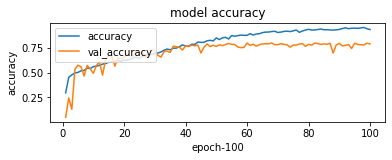

In [11]:
plt.figure(1)
# summarize history for accuracy
epoch_range = range(1,epoch+1)
plt.subplot(211)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch-'+str(epoch))
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.savefig('logs/model_accuracy-'+'epoch-'+str(epoch)+'-'+'batch_size-'+str(batch_size)+'.png')
plt.show()

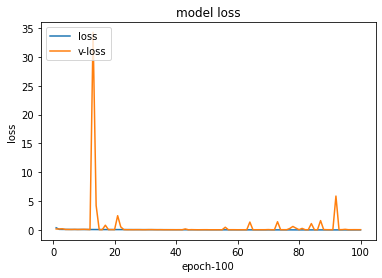

In [12]:
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch-'+str(epoch))
plt.legend(['loss', 'v-loss'], loc='upper left')
plt.savefig('logs/model_loss-'+'epoch-'+str(epoch)+'-'+'batch_size-'+str(batch_size)+'.png')
plt.show()


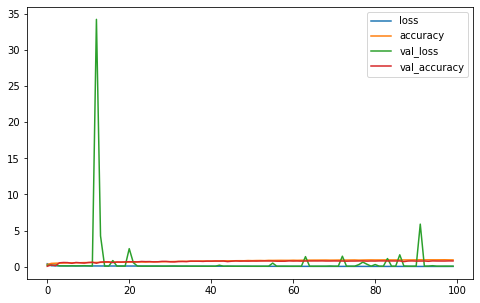

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [20]:
print("Highest Accuraccy: ",max(history.history['accuracy']))

Highest Accuraccy:  0.9524984359741211


In [21]:
print("Lowest Accuraccy: ",min(history.history['accuracy']))

Lowest Accuraccy:  0.296113520860672


In [22]:
import statistics

In [23]:
print("Mean Accuraccy: ",avg(history.history['accuracy']))

Mean Accuraccy:  0.7840160372853279


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


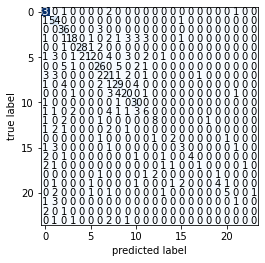

In [24]:
import numpy as np
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

rounded_predictions = model.predict_classes(x_test, batch_size=10, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm2 = confusion_matrix(y_target=rounded_labels, 
                      y_predicted=rounded_predictions, 
                      binary=False,positive_label=1
                      )
def cm_to_inch(value):
    return value/2.54
fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
plt.show()

In [25]:
%tensorboard --logdir logs/fit